In [1]:
import sys
sys.path.append('../..')

import numpy as np
import matplotlib.pyplot as plt
import librosa as lb
import sounddevice as sd

from src.VAE.utils.data import load_random_wave, trim_wave

from src.VAE.utils.converters.cqt_converter import CqtConverter
from src.VAE.utils.converters.stft_converter import StftConverter
from src.VAE.utils.converters.mfcc_converter import MfccConverter

from src.VAE.utils.conversion import pad_or_trim

In [2]:
DATA_PATH = r'..\..\data\drums-one_shots'

In [3]:
wave, sr, name = load_random_wave(DATA_PATH)

c:\Users\llama\anaconda3\envs\bakalarka\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=256 is too large for input signal of length=138
  warnings.warn(


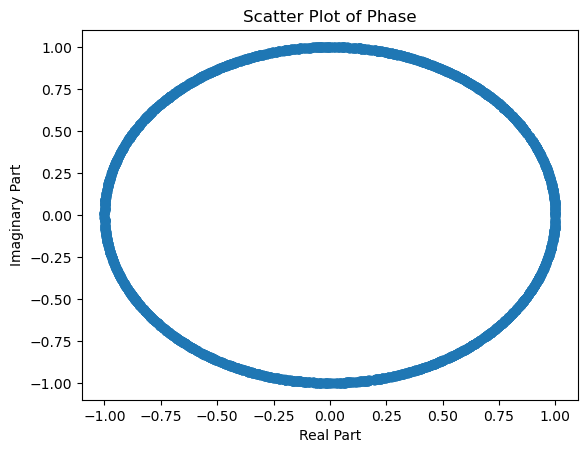

In [4]:
cqt = lb.cqt(wave, sr=sr)

mag, phase = lb.magphase(cqt)

plt.scatter(phase.real, phase.imag)
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Scatter Plot of Phase')
plt.show()



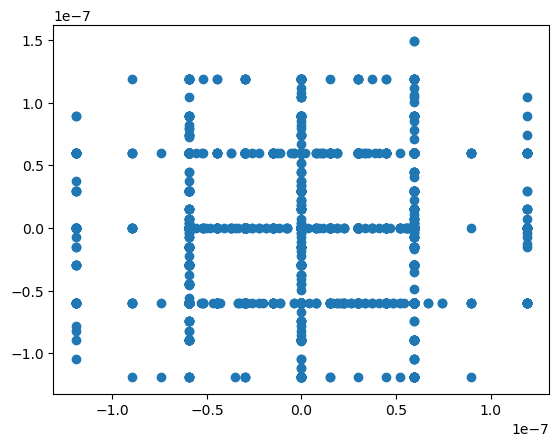

In [5]:
np.abs(phase)

angle = np.angle(phase)

phase_reconstructed = np.exp(1j * angle)

# plt.scatter(phase_reconstructed.real, phase_reconstructed.imag)

diff = phase - phase_reconstructed

plt.scatter(diff.real, diff.imag)

In [6]:
wave, sr, name = load_random_wave(DATA_PATH)

converter = CqtConverter()

cqt_config = converter.get_default_config()

cqt = converter.convert_wave_to_spectogram(wave, sr, cqt_config['kwargs'])

wave_converted = converter.convert_spectogram_to_wave(cqt, sr, cqt_config['kwargs'])

sd.play(wave, samplerate=sr)
sd.wait()
sd.play(wave_converted, samplerate=sr)
sd.wait()

wave.shape, wave_converted.shape


c:\Users\llama\anaconda3\envs\bakalarka\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1426
  warnings.warn(
c:\Users\llama\anaconda3\envs\bakalarka\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=713
  warnings.warn(
c:\Users\llama\anaconda3\envs\bakalarka\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=357
  warnings.warn(
c:\Users\llama\anaconda3\envs\bakalarka\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=179
  warnings.warn(
c:\Users\llama\anaconda3\envs\bakalarka\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=90
  warnings.warn(


(512, 90) (512, 90)
(512, 90)


((22816,), (22784,))

In [7]:
wave, sr, name = load_random_wave(DATA_PATH)

converter = CqtConverter()

cqt_config = converter.get_default_config()

cqt = lb.cqt(wave, sr=sr, **cqt_config['kwargs'])

inverse_cqt_config = converter._get_inverse_cqt_kwargs(cqt_config['kwargs'])

wave_converted = lb.icqt(cqt, sr=sr, **inverse_cqt_config)

sd.play(wave, samplerate=sr)
sd.wait()
sd.play(wave_converted, samplerate=sr)
sd.wait()

c:\Users\llama\anaconda3\envs\bakalarka\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1920
  warnings.warn(
c:\Users\llama\anaconda3\envs\bakalarka\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=960
  warnings.warn(
c:\Users\llama\anaconda3\envs\bakalarka\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=480
  warnings.warn(
c:\Users\llama\anaconda3\envs\bakalarka\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=240
  warnings.warn(


In [8]:
wave, sr, name = load_random_wave(DATA_PATH)

stft = lb.stft(wave)

wave_converted = lb.istft(stft)

sd.play(wave, samplerate=sr)
sd.wait()
sd.play(wave_converted, samplerate=sr)
sd.wait()

In [9]:
wave, sr, name = load_random_wave(DATA_PATH)

wave = trim_wave(wave, sr, length=2)
name

'clap_0338.wav'

In [55]:

converter = StftConverter()

stft_config = converter.get_default_config()

stft_config['kwargs']['n_fft'] = 512
stft_config['kwargs']['hop_length'] = 256

stft = converter.convert_wave_to_spectogram(wave, sr, stft_config['kwargs'])

print(stft.shape)

wave_converted = converter.convert_spectogram_to_wave(stft, sr, stft_config['kwargs'])

stft_2 = pad_or_trim(stft, 256, stft_config)

wave_converted_2 = converter.convert_spectogram_to_wave(stft_2, sr, stft_config['kwargs'])

stft_3 = stft[:,:-1,:]
print(stft_3.shape)

wave_converted_3 = converter.convert_spectogram_to_wave(stft_3, sr, stft_config['kwargs'])


sd.play(wave, samplerate=sr)
sd.wait()
sd.play(wave_converted, samplerate=sr)
sd.wait()
sd.play(wave_converted_2, samplerate=sr)
sd.wait()
sd.play(wave_converted_3, samplerate=sr)
sd.wait()

print(wave.size / sr)
print(wave_converted_2.size / sr)

(2, 257, 259)
(2, 256, 259)
1.5
1.4802721088435373


In [11]:
wave, sr, name = load_random_wave(DATA_PATH)

In [54]:
converter = StftConverter()

stft_config = converter.get_default_config()

stft = converter.convert_wave_to_spectogram(wave, sr, stft_config['kwargs'])

stft_2 = pad_or_trim(stft, 100, stft_config)

wave_converted = converter.convert_spectogram_to_wave(stft_2, sr, stft_config['kwargs'])

stft.shape, stft_2.shape, wave_converted.size / sr

((2, 257, 259), (2, 257, 100), 0.5746938775510204)

In [ ]:
from src.VAE.models.load_model import create_model

model = create_model('VAE_1', 32)

In [ ]:
from src.VAE.utils.add_noise import generate_noise

In [ ]:
noise_function = generate_noise(1, 0.5, 'normal', 'pixel', 'multiplicative')

wave, sr, name = load_random_wave(DATA_PATH)

wave = trim_wave(wave, sr, length=2)

stft = lb.stft(wave)

mag, phase = lb.magphase(stft)

mag_noisy = noise_function(mag)

reconstructed_wave = lb.griffinlim(mag)

reconstructed_wave_noisy = lb.griffinlim(mag_noisy)

sd.play(wave, samplerate=sr)
sd.wait()
sd.play(reconstructed_wave, samplerate=sr)
sd.wait()
sd.play(reconstructed_wave_noisy, samplerate=sr)
sd.wait()

In [ ]:
noise_function = generate_noise(1, 0.05, 'normal', 'pixel', 'multiplicative')

wave, sr, name = load_random_wave(DATA_PATH)

wave = trim_wave(wave, sr, length=2)

mfcc_converter = MfccConverter()
mfcc_config = mfcc_converter.get_default_config()

mfcc = mfcc_converter.convert_wave_to_spectogram(wave, sr, mfcc_config['kwargs'])

mfcc_noisy = noise_function(mfcc)

wave_converted = mfcc_converter.convert_spectogram_to_wave(mfcc, sr, mfcc_config['kwargs'])

wave_converted_noisy = mfcc_converter.convert_spectogram_to_wave(mfcc_noisy, sr, mfcc_config['kwargs'])

sd.play(wave, samplerate=sr)
sd.wait()
sd.play(wave_converted, samplerate=sr)
sd.wait()
sd.play(wave_converted_noisy, samplerate=sr)
sd.wait()

In [79]:
wave, sr, name = load_random_wave(DATA_PATH, 'tom')


In [82]:
from src.VAE.models.load_model import load_model
from src.VAE.utils.config import Config
from pathlib import Path
from src.VAE.utils.data import prepare_wave_for_model, tensor_to_wave, tensor_to_spectogram, save_wave

model_path = Path(r'C:\Users\llama\Desktop\cuni\bakalarka\Bachelor_thesis-Electronic_music\results\models\tom__VAE_4_2_channels__conversion=stft__epochs=2000\kl_regularisation=1e-05__noise=mul')
output_path = Path(r'C:\Users\llama\Desktop\unary_models_stft_samples\test_with_griffinlim')


model = load_model(model_path / 'model.pkl', 'VAE_4_2_channels',32)

wave = trim_wave(wave, sr, length=1.5)

config = Config.load(model_path / 'config.json')

stft = prepare_wave_for_model(wave, sr, config)

stft_reconstructed, _, _ = model(stft)

wave_reconstructed = tensor_to_wave(stft_reconstructed, sr, config)

stft_2 = tensor_to_spectogram(stft_reconstructed, config)[0,:,:]

wave_reconstructed_2 = lb.griffinlim(stft_2, hop_length=256)

sd.play(wave, samplerate=sr)
sd.wait()
sd.play(wave_reconstructed_2, samplerate=sr)
sd.wait()
sd.play(wave_reconstructed, samplerate=sr)
sd.wait()

print(f'wave length: {wave.size / sr}')
print(f'wave_reconstructed length: {wave_reconstructed.size / sr}')
print(f'wave_reconstructed_2 length: {wave_reconstructed_2.size / sr}')

wave length: 1.4857596371882087
wave_reconstructed length: 1.4802721088435373
wave_reconstructed_2 length: 1.4802721088435373


In [81]:
save_wave(wave, sr, output_path / f'{name}_original.wav')
save_wave(wave_reconstructed, sr, output_path / f'{name}_reconstructed.wav')
save_wave(wave_reconstructed_2, sr, output_path / f'{name}_reconstructed_grimlin.wav')